![](https://www.caf.com/media/2630948/covid19-iniciativas-innovacion-social.jpg?anchor=center&amp;mode=crop&amp;width=1421&amp;height=386&amp;rnd=132500811190000000)

                                        SARS-CoV-2 Viral Mutations

                    Hypothesis - One SARS-CoV-2 mutation replaces another mutation over time.

Questions:
1. What are the main mutations of Covid virus and what are the total numbers of infections?
2. How do the strongest mutations spread over time?
3. In how many days can a new virus mutation reach its peak?
4. Examine these features by countries.

Database source - https://www.kaggle.com/yamqwe/omicron-covid19-variant-daily-cases
The database contains data:
   1. Country
   2. Date from 11/05/2020 to 27/12/2021
   3. Name of the covido strain
   4. Recorded quantity of each variety by country and day
   5. The quantity recorded for each variety shall be expressed as a percentage of the total quantity by country and day
   6. Total number of cases by day and country
   
Data Analyse make using: MySQL, Jupyter Notebook (numpy, pandas, matplotlib, seaborn, datetime modules), Tableau

# Data Processing

## Modules Importing

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Uploading from MySQL¶

In [3]:
import mysql.connector
import pandas as pd
mydb = mysql.connector.connect(
    host="localhost",
    port="3317",
    user="root",
    password="*",
)
cursor = mydb.cursor()
cursor.execute('USE new_schema')
table = pd.read_sql('SELECT * FROM new_schema.covid_variants', con=mydb)
table.head(10)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
5,Angola,2020-07-06,B.1.177,0,0.0,3
6,Angola,2020-07-06,B.1.221,0,0.0,3
7,Angola,2020-07-06,B.1.258,0,0.0,3
8,Angola,2020-07-06,B.1.367,0,0.0,3
9,Angola,2020-07-06,B.1.620,0,0.0,3


## Data Correcting

In [4]:
table['date'] = pd.to_datetime(table['date'])
table
#date columuns means converting from string to datetime format.

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
98875,Zimbabwe,2021-11-01,Omicron,0,0.0,6
98876,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
98877,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
98878,Zimbabwe,2021-11-01,others,0,0.0,6


## Quick Data Overview

In [6]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98880 entries, 0 to 98879
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   location             98880 non-null  object        
 1   date                 98880 non-null  datetime64[ns]
 2   variant              98880 non-null  object        
 3   num_sequences        98880 non-null  int64         
 4   perc_sequences       98880 non-null  float64       
 5   num_sequences_total  98880 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.5+ MB


In [7]:
table.describe()

,num_sequences,perc_sequences,num_sequences_total
count,98880.000000,98880.000000,98880.000000
mean,71.371764,6.183627,1487.336893
std,1647.587144,21.952468,8292.972705
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,392.250000
max,142255.000000,100.000000,146145.000000


In [8]:
table['variant'].unique()
#Unique Covid mutation

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [10]:
table['location'].value_counts()
#Countries and thier rows counts

India          1056
Sweden         1056
Switzerland    1056
Singapore      1056
Denmark        1056
               ... 
Montenegro      384
Fiji            336
Benin           336
Monaco          336
Brunei          240
Name: location, Length: 120, dtype: int64

In [12]:
table['date'].value_counts()
#Countries and thier rows counts

2021-01-25    2688
2021-02-08    2664
2021-07-26    2616
2021-03-08    2616
2021-07-12    2616
2021-05-03    2616
2021-01-04    2616
2021-04-19    2616
2021-02-22    2592
2021-08-09    2568
2021-06-14    2568
2021-05-31    2568
2021-06-28    2544
2021-05-17    2520
2021-03-22    2496
2021-04-05    2496
2021-09-06    2448
2021-08-23    2400
2020-12-21    2400
2021-01-11    2376
2020-11-23    2280
2021-11-01    2256
2021-09-20    2256
2020-12-07    2232
2021-10-04    2208
2020-10-12    2184
2021-10-18    2184
2020-11-09    2112
2020-08-17    2088
2021-11-15    2088
2020-08-31    2064
2020-10-26    2064
2020-09-28    2016
2020-09-14    1992
2021-11-29    1968
2021-12-13    1944
2020-07-20    1896
2020-05-11    1872
2020-06-08    1872
2020-06-22    1872
2020-08-03    1848
2020-07-06    1776
2020-05-25    1728
2021-12-27    1056
Name: date, dtype: int64

## Information Presantation in Data

In [13]:
table[
    (table['location'] == 'Sweden') &
    (table['date'] == '2021-09-06')
]

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
87504,Sweden,2021-09-06,Alpha,2,0.04,5028
87505,Sweden,2021-09-06,B.1.1.277,0,0.00,5028
87506,Sweden,2021-09-06,B.1.1.302,0,0.00,5028
87507,Sweden,2021-09-06,B.1.1.519,0,0.00,5028
87508,Sweden,2021-09-06,B.1.160,0,0.00,5028
87509,Sweden,2021-09-06,B.1.177,0,0.00,5028
87510,Sweden,2021-09-06,B.1.221,0,0.00,5028
87511,Sweden,2021-09-06,B.1.258,0,0.00,5028
87512,Sweden,2021-09-06,B.1.367,0,0.00,5028
87513,Sweden,2021-09-06,B.1.620,0,0.00,5028



Table structure by country and date. random country(Sweden) and date(2021-09-06) are selected.
From these data it can be seen that in Sweden on 06/09/2021 the delta varieties were 5025 (99.94% for the day),
and Alpha 2 (0.04%).
The total number of cases is 5028. 

# Data Analysis

## SARS-CoV-2 strains and their infections 

In [14]:
variant_num = pd.DataFrame(table.groupby('variant')['num_sequences'].sum())
variant_num = variant_num.sort_values(by='num_sequences', ascending=False)
variant_num = variant_num.reset_index()
variant_num
#Table have 22(plius 'other' ir 'non who') SARS-Cov-2 mutations.
#In this Table we can see total infections amount of every mutation for all countries and dates.
#The bigest infection amount have the Delta mutation.

,variant,num_sequences
0,Delta,3712551
1,Alpha,1131746
2,non_who,929412
3,others,640952
4,B.1.177,170453
5,Gamma,114632
6,Epsilon,66100
7,Omicron,52080
8,Iota,42901
9,Beta,40504


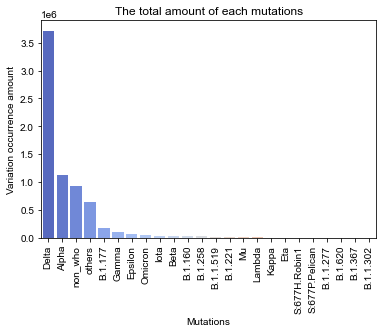

In [15]:
variant = variant_num['variant']
num = variant_num['num_sequences']

sns.barplot(x=variant, y=num, palette="coolwarm")
plt.xticks(rotation=90)
plt.ylabel('Variation occurrence amount')
plt.xlabel('Mutations')
plt.title('The total amount of each mutations')
sns.set_style("whitegrid")
plt.show()

From the tables we can see that the Delta mutation, which is still active at the moment, was the biggest case.
The Alpha variety also ranks high (2).
The Omicron variety, which is currently receiving a lot of attention, is spreading rapidly and has already recorded 52,080 cases.

## Mutations in terms of time

In [17]:
variant_num[(variant_num['variant'] != 'non_who') & (variant_num['variant'] != 'others')].head(6)
#Choose Top strongest mutations

,variant,num_sequences
0,Delta,3712551
1,Alpha,1131746
4,B.1.177,170453
5,Gamma,114632
6,Epsilon,66100
7,Omicron,52080


In [19]:
variant_date = table.groupby(['variant','date'])['num_sequences'].agg([np.mean, np.std])
variant_date = variant_date.reset_index()
variant_date

,variant,date,mean,std
0,Alpha,2020-05-11,0.000000,0.000000
1,Alpha,2020-05-25,0.000000,0.000000
2,Alpha,2020-06-08,0.000000,0.000000
3,Alpha,2020-06-22,0.000000,0.000000
4,Alpha,2020-07-06,0.000000,0.000000
...,...,...,...,...
1051,others,2021-11-01,6.255319,43.008360
1052,others,2021-11-15,10.551724,77.191058
1053,others,2021-11-29,11.146341,74.886436
1054,others,2021-12-13,6.345679,24.031833


### The Delta

In [22]:
delta_date = variant_date[variant_date['variant'] == 'Delta'].sort_values(by='date',)
delta_date = delta_date[delta_date['mean'] != 0]
delta_date = delta_date.reset_index()
delta_date.iloc[[0, 31]]
# In this table can see first and last day, when mutation was detected.

,index,variant,date,mean,std
0,496,Delta,2020-10-26,0.034884,0.239984
31,527,Delta,2021-12-27,683.568182,2593.701946


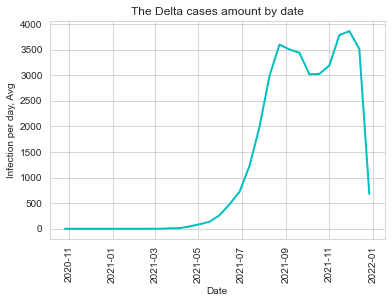

In [23]:
x = delta_date['date']
y = delta_date['mean']


plt.plot(x, y, linewidth=2.0, c='c')
plt.xticks(rotation=90,)
plt.xlabel('Date')
plt.ylabel('Infection per day, Avg')
plt.title('The Delta cases amount by date')
plt.show()

### The Alpha

In [26]:
alpha_date = variant_date[variant_date['variant'] == 'Alpha'].sort_values(by='date',)
alpha_date = alpha_date[alpha_date['mean'] != 0]
alpha_date = alpha_date.reset_index()
alpha_date.iloc[[0,32]]
# In this table can see first and last day, when mutation was detected

,index,variant,date,mean,std
0,10,Alpha,2020-09-28,0.035714,0.327327
32,42,Alpha,2021-12-13,0.197531,0.781341


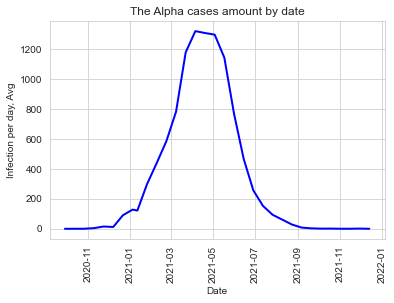

In [30]:
x = alpha_date['date']
y = alpha_date['mean']


plt.plot(x, y, linewidth=2.0, c='b')
plt.xticks(rotation=90,)
plt.xlabel('Date')
plt.ylabel('Infection per day, Avg')
plt.title('The Alpha cases amount by date')
plt.show()

### The B.1.177

In [29]:
b_date = variant_date[variant_date['variant'] == 'B.1.177'].sort_values(by='date',)
b_date = b_date[b_date['mean'] != 0]
b_date = b_date.reset_index()
b_date.iloc[[0,42]]
# In this table can see first and last day, when mutation was detected.

,index,variant,date,mean,std
0,220,B.1.177,2020-05-11,0.025641,0.226455
42,263,B.1.177,2021-12-27,0.022727,0.150756


<function matplotlib.pyplot.show(close=None, block=None)>

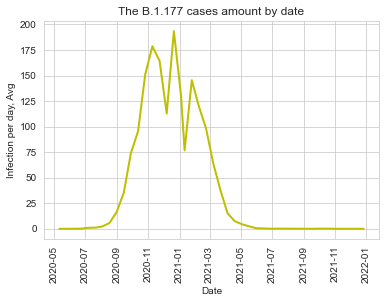

In [38]:
x = b_date['date']
y = b_date['mean']


plt.plot(x, y, linewidth=2.0, c='y')
plt.xticks(rotation=90,)
plt.xlabel('Date')
plt.ylabel('Infection per day, Avg')
plt.title('The B.1.177 cases amount by date')
plt.show

### Gamma

In [33]:
gamma_date = variant_date[variant_date['variant'] == 'Gamma'].sort_values(by='date',)
gamma_date = gamma_date[gamma_date['mean'] != 0]
gamma_date = gamma_date.reset_index()
gamma_date.iloc[[0, 29]]
#In this table can see first and last day, when mutation was detected.

,index,variant,date,mean,std
0,629,Gamma,2020-11-09,0.022727,0.213201
29,658,Gamma,2021-12-13,0.061728,0.289209


<function matplotlib.pyplot.show(close=None, block=None)>

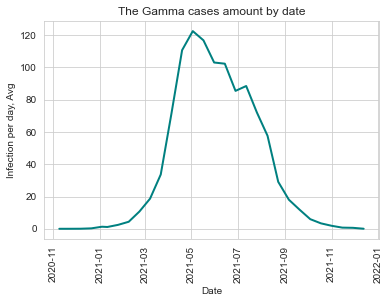

In [37]:
x = gamma_date['date']
y = gamma_date['mean']


plt.plot(x, y, linewidth=2.0, c='teal')
plt.xticks(rotation=90,)
plt.xlabel('Date')
plt.ylabel('Infection per day, Avg')
plt.title('The Gamma cases amount by date')
plt.show

### Omicron

In [35]:
omicron_date = variant_date[variant_date['variant'] == 'Omicron'].sort_values(by='date',)
omicron_date = omicron_date[omicron_date['mean'] != 0]
omicron_date = omicron_date.reset_index()
omicron_date
#In this table can see first and last day, when mutation was detected

,index,variant,date,mean,std
0,874,Omicron,2021-10-18,0.010989,0.104828
1,875,Omicron,2021-11-01,0.021277,0.145079
2,876,Omicron,2021-11-15,0.517241,2.618637
3,877,Omicron,2021-11-29,15.195122,75.831919
4,878,Omicron,2021-12-13,242.691358,1300.565893
5,879,Omicron,2021-12-27,707.454545,3544.389772


<function matplotlib.pyplot.show(close=None, block=None)>

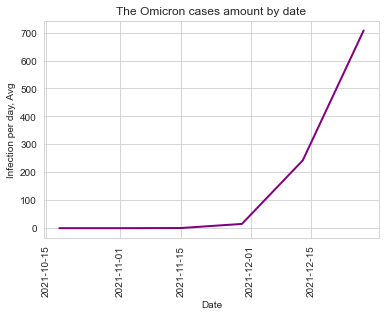

In [36]:
x = omicron_date['date']
y = omicron_date['mean']


plt.plot(x, y, linewidth=2.0, c='purple')
plt.xticks(rotation=90,)
plt.xlabel('Date')
plt.ylabel('Infection per day, Avg')
plt.title('The Omicron cases amount by date')
plt.show

### Summary

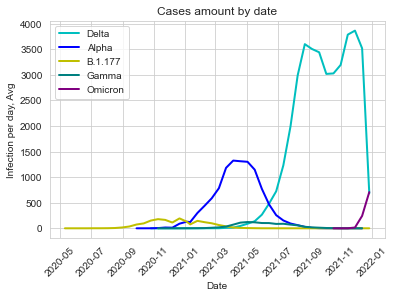

In [39]:
x1 = delta_date['date']
y1= delta_date['mean']
x2 = alpha_date['date']
y2 = alpha_date['mean']
x3 = b_date['date']
y3 = b_date['mean']
x4 = gamma_date['date']
y4 = gamma_date['mean']
x5 = omicron_date['date']
y5 = omicron_date['mean']


plt.plot(x1, y1, linewidth=2.0, c='c')
plt.plot(x2, y2, linewidth=2.0, c='b')
plt.plot(x3, y3, linewidth=2.0, c='y')
plt.plot(x4, y4, linewidth=2.0, c='teal')
plt.plot(x5, y5, linewidth=2.0, c='purple')
plt.legend(['Delta', 'Alpha', 'B.1.177', 'Gamma', 'Omicron'])

plt.xticks(rotation=45,)
plt.xlabel('Date')
plt.ylabel('Infection per day, Avg')
plt.title('Cases amount by date')
plt.show()

## Peaks of Mutations

### The Delta

In [42]:
delta_date.head(1)

,index,variant,date,mean,std
0,496,Delta,2020-10-26,0.034884,0.239984


In [44]:
table[(table['variant'] == 'Delta') & (table['num_sequences'] != 0)]['num_sequences'].max()
#max 142 255 cases per day
table[table['num_sequences'] == 142255]

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
96011,United States,2021-08-09,Delta,142255,97.34,146145


In [45]:
delta_date['date'][0]

Timestamp('2020-10-26 00:00:00')

In [49]:
date_2 = table['date'][96011]
date_1 = delta_date['date'][0]
dtime_delta = (date_2 - date_1).days
print(f'Peak of The Delta is after {dtime_delta} days')

Peak of The Delta is after 287 days


In [63]:
table[(table['variant'] == 'Delta') & (table['num_sequences'] != 0)]['num_sequences'].max()
#max 142 255 cases per day
table[table['num_sequences'] == 142255]
delta_date.head(1)
date_2 = table['date'][96011]
date_1 = delta_date['date'][0]
dtime_delta = (date_2 - date_1).days
print(f'Peak of The Delta is after {dtime_delta} days')

alpha_date.head(1)
table[(table['variant'] == 'Alpha') & (table['num_sequences'] != 0)]['num_sequences'].max()
#max 49 318 cases per day
table[table['num_sequences'] == 49318]
date_2 = table['date'][95808]
date_1 = alpha_date['date'][0]
atime_delta = (date_2 - date_1).days
print(f'Peak of The Alpha is after {atime_delta} days')

b_date.head(1)
table[(table['variant'] == 'B.1.177') & (table['num_sequences'] != 0)]['num_sequences'].max()
#max 12377 cases per day
table[table['num_sequences'] == (table[(table['variant'] == 'B.1.177') & (table['num_sequences'] != 0)]['num_sequences'].max())]
date_2 = table['date'][94469]
date_1 = b_date['date'][0]
btime_delta = (date_2 - date_1).days
print(f'Peak of The B.1.177 is after {btime_delta} days')

gamma_date.head(1)
table[table['num_sequences'] == (table[(table['variant'] == 'Gamma') & (table['num_sequences'] != 0)]['num_sequences'].max())]
date_2 = table['date'][95846]
date_1 = gamma_date['date'][0]
gtime_delta = (date_2 - date_1).days
print(f'Peak of The Gamma is after {gtime_delta} days')

omicron_date.head(1)
today = datetime.datetime.today()
date_1 = omicron_date['date'][0]
otime_delta = (today - date_1).days
print(f'The Omicron is active {otime_delta} days')



Peak of The Delta is after 287 days
Peak of The Alpha is after 203 days
Peak of The B.1.177 is after 182 days
Peak of The Gamma is after 175 days
The Omicron is active 92 days


## Covid mutations in some countries

In [5]:
not_null = table[(table['num_sequences'] != 0) & (table['variant'].isin(['Delta', 'Alpha', 'B.1.117', 'Gamma', 'Omicron']))].reset_index()
not_null 

,index,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,216,Angola,2021-01-25,Alpha,3,5.77,52
1,240,Angola,2021-02-08,Alpha,4,9.52,42
2,264,Angola,2021-02-22,Alpha,1,2.56,39
3,288,Angola,2021-03-08,Alpha,7,6.19,113
4,312,Angola,2021-03-22,Alpha,12,9.92,121
...,...,...,...,...,...,...,...
4196,98771,Zimbabwe,2021-09-06,Delta,14,100.00,14
4197,98795,Zimbabwe,2021-09-20,Delta,6,100.00,6
4198,98819,Zimbabwe,2021-10-04,Delta,2,100.00,2
4199,98843,Zimbabwe,2021-10-18,Delta,5,100.00,5


In [6]:
not_null.to_csv('C:\\Users\\ievak\\Downloads\\muation_data.csv')

In this charpter is using Tableau Deskop (one of BI Software).

### Mutations in all Countries

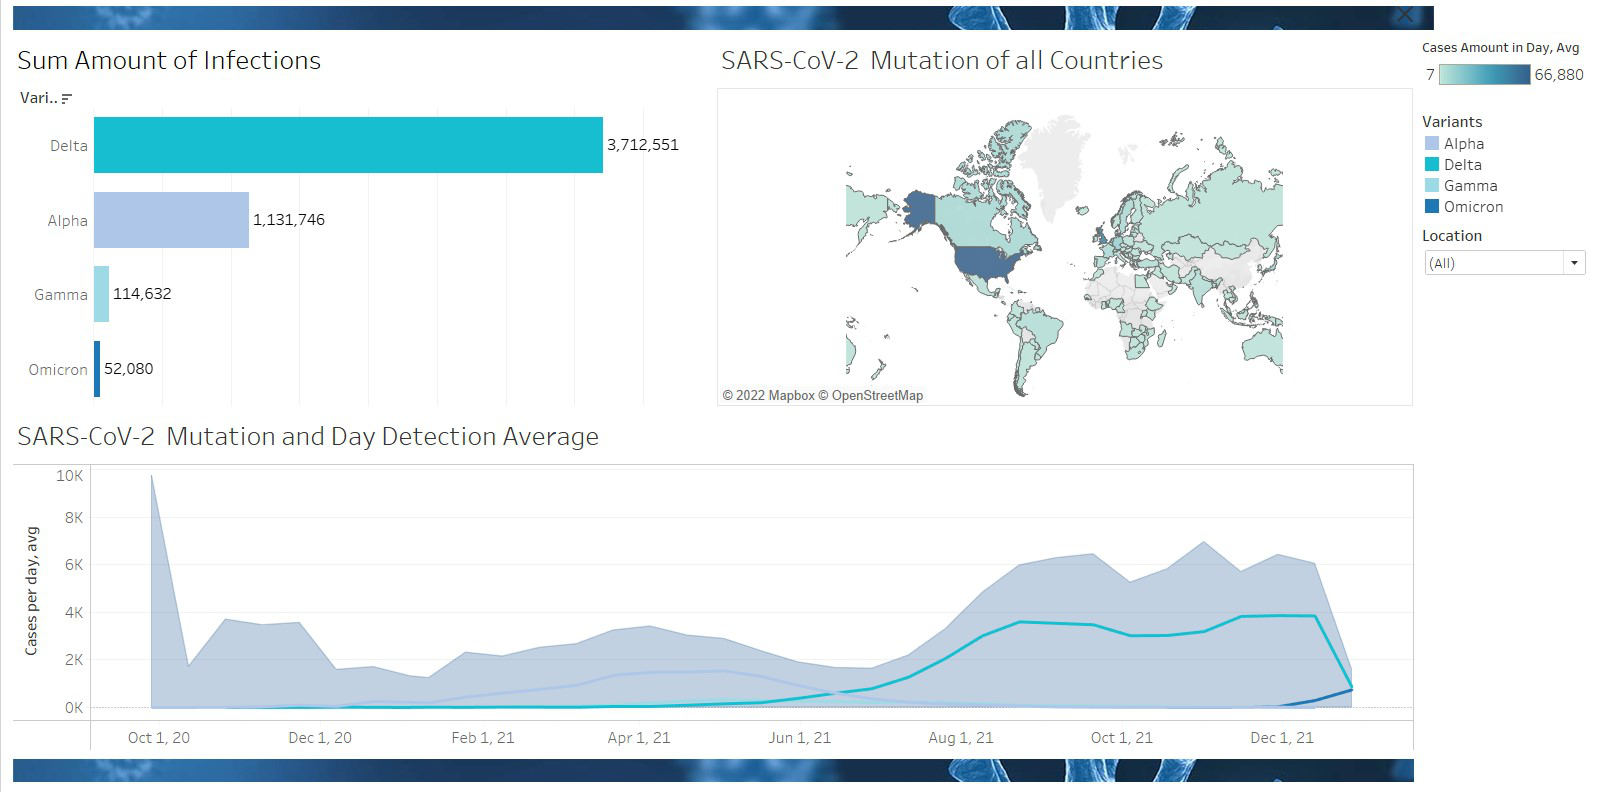

In [14]:
from PIL import Image
all_countries = Image.open("mutations_in_all_countries.jpg")
all_countries

In this picture we can see, that after one mutation start other mutations. 

### Mutations in United States

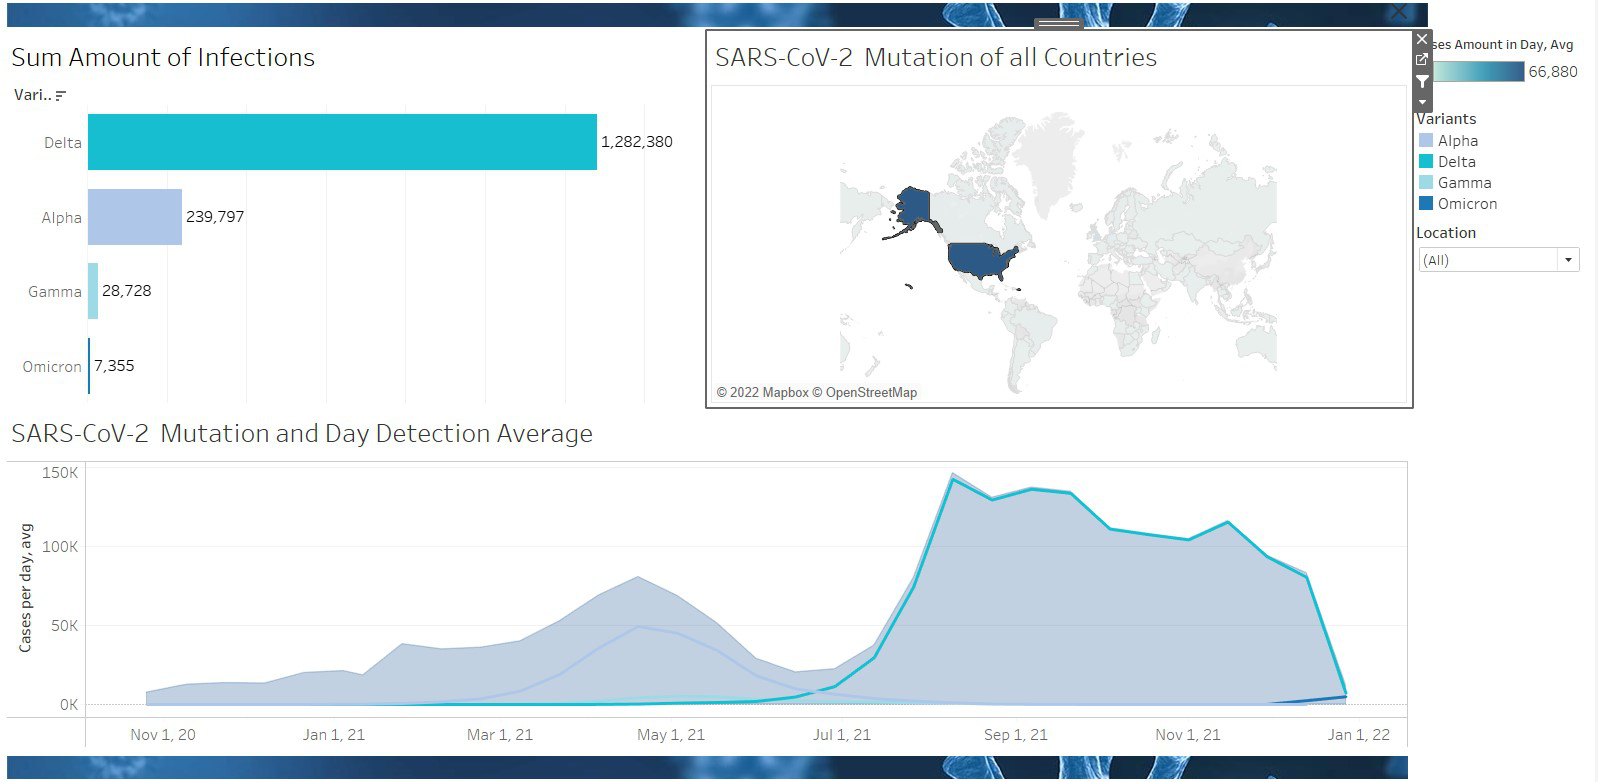

In [17]:
United_States = Image.open("mutations_in_United_States.jpg")
United_States

### Mutations in Lithuania

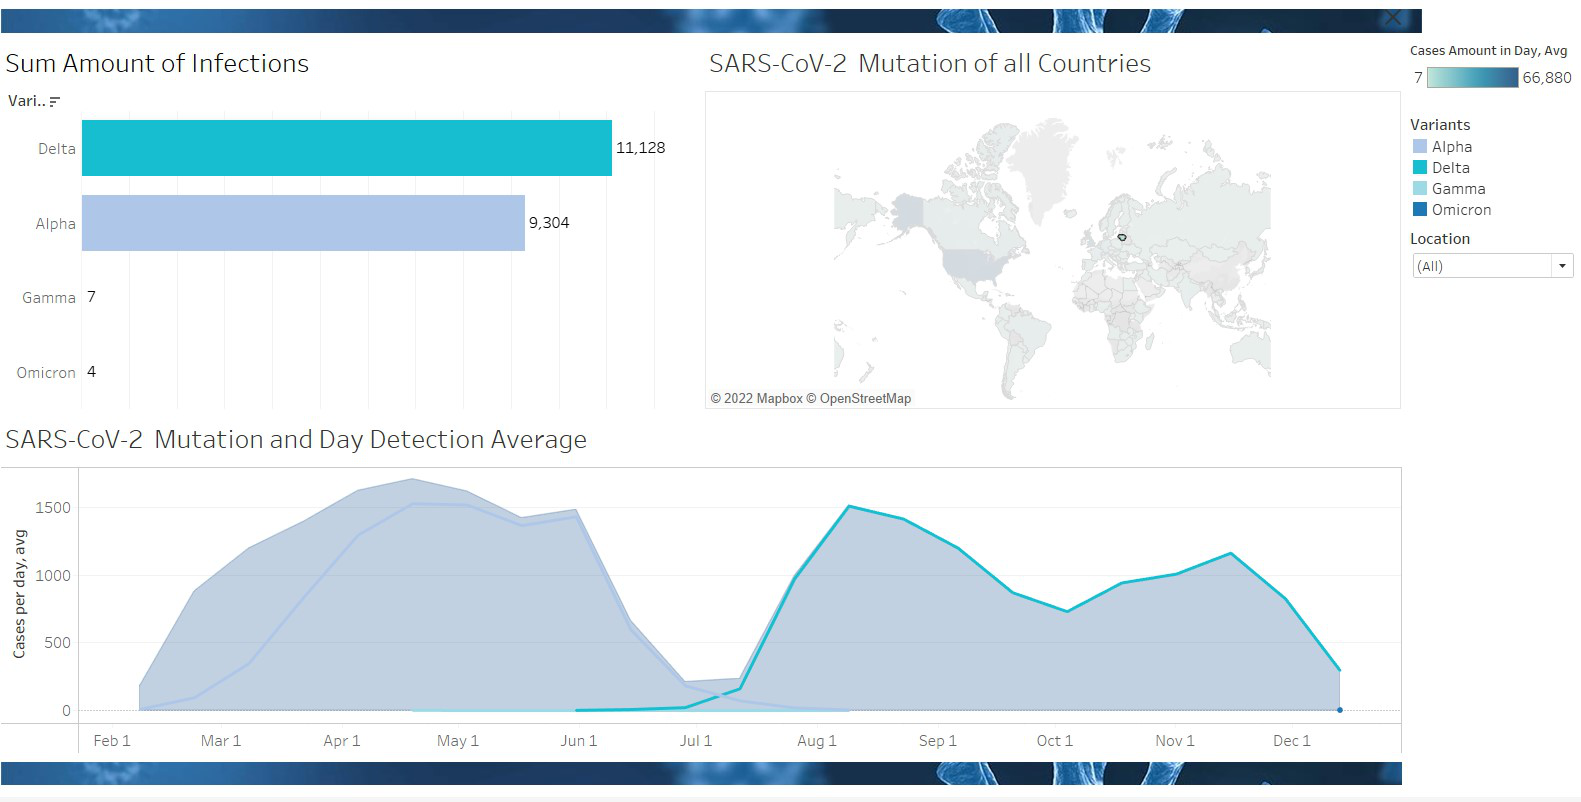

In [18]:
Lithuania = Image.open("mutations_in_Lithuania.jpg")
Lithuania

# Conclusions 

                One SARS-CoV-2 mutation replaces another mutation over time!

1. Main mutations: 
    The Delta -3712551 cases, 
    The Alpha-1131746 cases, 
    The B.1.177-170453 cases, 
    The Gamma-114632 cases, 
    The Epsilon-66100 cases, 
    The Omicron-52080 cases.
    
2. All mutations initially have a small infection amount and after a while jump up suddenly. After the peak, a decrease also suddenly. In the general graph of the varieties, we see how one muation starts to decline, the other rises.

3. The peaks of all varieties appear similarly - after 200 days, depending on the intensity of their occurrence. Delta peak after 287 days, Alpha peak after 203 days, B.1.177 peak after 182 days, Gamma peak after 175 days, Omicron active 92 days.

4. In most countries, the prevalence of a particular SARS-CoV-2 mutation is that people are more likely to become infected with it, and the incidence of other mutations is significantly reduced.

![](https://www.caf.com/media/2630948/covid19-iniciativas-innovacion-social.jpg?anchor=center&amp;mode=crop&amp;width=1421&amp;height=386&amp;rnd=132500811190000000)